# Imports

In [ ]:
!pip install xgboost
import pandas as pd
import re

In [ ]:
data = bot_df = pd.read_csv("tweet_data.csv")

- Emoji library used to utilise emojis in texts, part of data cleaning
- Xgboost library to implement xgboost classifier
- Pandas library for cleaning and categorising data
- Re library to clean data based on regular expressions
- pd.read to read the csv file of the dataset






# Cleaning and Processing Data

**Null values**

In [ ]:
data.isnull().sum() # Check the number of null values for each column

,0
conversation_id_str,1
created_at,1
favorite_count,1
full_text,3
id_str,1
image_url,9259
in_reply_to_screen_name,5365
lang,1
location,1745
quote_count,1


In [ ]:
data['full_text'].head(100)

,full_text
0,@DefiantLs Saturday night fever? Lmao
1,@Brotherkingcam That man shot her give it a f*...
2,@Donjuliozz Yup yup il try and you too bro
3,@stackztootrill @captnoknees You wouldn't last...
4,Vodafone joins @Google s #VPP programme to hel...
...,...
95,1.6 magnitude #earthquake. 24 km from Sutton-A...
96,@ValorINTEL - Lotus + Haven - Breeze + Fracture
97,Can you help me out? I am trying to get a free...
98,Loving #CharacterX# Chat and voice talk with u...


In [ ]:
# Replacing every null value with non-null values, 5 columns have null values
data['image_url'].fillna('None', inplace=True)
data['in_reply_to_screen_name'].fillna('None', inplace=True)
data['location'].fillna('unknown', inplace=True)

<ipython-input-5-f8d46feed00b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['image_url'].fillna('None', inplace=True)
<ipython-input-5-f8d46feed00b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [ ]:
# Dropping columns with empty text
data.dropna(inplace=True)

**Removing newlines and tabs**

In [ ]:
# Makes the description form in one line
def clean_text(text):
    if isinstance(text, str):
        return text.replace('\n', ' ').replace('\t', ' ')
    return text

data['full_text'] = data['full_text'].apply(clean_text)

**Additional data**

In [ ]:
# Check if text has links
def contains_link(text):
    if not isinstance(text, (str, bytes)):
        return False
    url_regex = r'(http://|https://|www\.)\S+'
    return bool(re.search(url_regex, text))

data['text_has_link'] = data['full_text'].apply(contains_link)

# Check if text has an image/video
def has_attachment(text):
  if(text != 'None'):
    return True

  return False

data['has_media_attachment'] = data['image_url'].apply(has_attachment)


# Check the tweet length
def text_length(text):
  if(text != 'None'):
    return len(str(text))

  return 0

data['tweet_length'] = data['full_text'].apply(text_length)


# Count the number of hashtags in the tweet
def count_hashtags(tweet):
    return sum(1 for word in tweet.split() if word.startswith('#') and len(word) > 1)

data['hashtag_count'] = data['full_text'].apply(count_hashtags)

# Check for number of punctuations per tweet
def count_punctuations(text):
  count = 0
  for i in range (0, len(text)):
    if text[i] in ('!', "," ,"\'" ,";" ,"\"", ".", "-" ,"?"):
        count += 1;
  return count

data['punctuation_count'] = data['full_text'].apply(count_punctuations)

# Check for capital letters
def count_capital(text):
    count = 0
    for char in text:
        if char.isupper():
            count += 1
    return count

data['capital_count'] = data['full_text'].apply(count_capital)

In [ ]:
data[['text_has_link', 'has_media_attachment', 'tweet_length', 'hashtag_count']].head(100)

,text_has_link,has_media_attachment,tweet_length,hashtag_count
0,False,True,38,0
1,False,False,108,0
2,False,True,42,0
3,False,False,89,0
4,True,False,271,6
...,...,...,...,...
95,True,True,93,2
96,False,False,47,0
97,True,True,174,0
98,True,False,195,4


In [ ]:
data[['full_text', 'capital_count', 'punctuation_count']].head(100)

,full_text,capital_count,punctuation_count
0,@DefiantLs Saturday night fever? Lmao,4,1
1,@Brotherkingcam That man shot her give it a f*...,2,0
2,@Donjuliozz Yup yup il try and you too bro,2,0
3,@stackztootrill @captnoknees You wouldn't last...,2,4
4,Vodafone joins @Google s #VPP programme to hel...,26,5
...,...,...,...
95,1.6 magnitude #earthquake. 24 km from Sutton-A...,11,4
96,@ValorINTEL - Lotus + Haven - Breeze + Fracture,10,2
97,Can you help me out? I am trying to get a free...,9,5
98,Loving #CharacterX# Chat and voice talk with u...,16,6


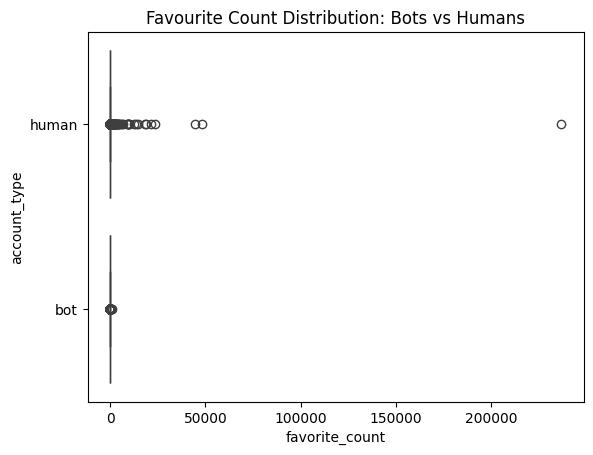

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y='account_type', x='favorite_count', data=data)
plt.title('Favourite Count Distribution: Bots vs Humans')
plt.show()

In [ ]:
# Removing outliers

data = data[data['favorite_count'] < 50000]

In [ ]:
data.to_csv('tweet_data_processed.csv', index=False)

# Visualization (Statistic)

In [ ]:
human_favorite_count = data[data['account_type'] == "human"]['favorite_count']
bot_favorite_count = data[data['account_type'] == "bot"]['favorite_count']

In [ ]:
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(human_favorite_count, bot_favorite_count)
print(f"t-statistic: {stat}")
print(f"p-value: {p_value}")

t-statistic: 2.9660243419897108
p-value: 0.003021157396788991


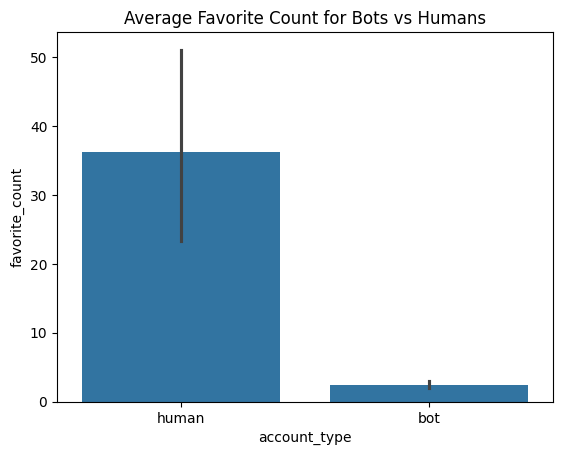

In [ ]:
sns.barplot(x='account_type', y='favorite_count', data=data, estimator='mean')
plt.title('Average Favorite Count for Bots vs Humans')
plt.show()

# MACHINE LEARNING

In [ ]:
selected_columns = [
    'favorite_count',
    'quote_count',
    'reply_count',
    'retweet_count',
    'text_has_link',
    'has_media_attachment',
    'tweet_length',
    'hashtag_count',
    'punctuation_count',
    'capital_count',
]

selected_data = data[selected_columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = selected_data
y = data['account_type'].map({'human': 0, 'bot': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Support Vector Machine

---

In [ ]:
svm_model = SVC(kernel='rbf', random_state=42)

svm_model.fit(X_train, y_train)
print("SVM model training complete!")

SVM model training complete!


In [ ]:
y_pred = svm_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Confusion Matrix:
[[2122  161]
 [ 445  520]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2283
           1       0.76      0.54      0.63       965

    accuracy                           0.81      3248
   macro avg       0.80      0.73      0.75      3248
weighted avg       0.81      0.81      0.80      3248

Accuracy: 81.34%


XgBoost Model

---



In [ ]:
import xgboost as xgb

# Set and initialize XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)
print("XGBoost model training complete!")

XGBoost model training complete!


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:58:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Predict and evaluate
y_pred = xgb_model.predict(X_test)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
print("\nAccuracy Score:")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Confusion Matrix:
[[2205   78]
 [  92  873]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2283
           1       0.92      0.90      0.91       965

    accuracy                           0.95      3248
   macro avg       0.94      0.94      0.94      3248
weighted avg       0.95      0.95      0.95      3248


Accuracy Score:
Accuracy: 94.77%


Decision Tree Classifier Model

---



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)
print("Decision Tree model training complete!")

Decision Tree model training complete!


In [ ]:
y_pred = dt_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Confusion Matrix:
[[2115  168]
 [ 117  848]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2283
           1       0.83      0.88      0.86       965

    accuracy                           0.91      3248
   macro avg       0.89      0.90      0.90      3248
weighted avg       0.91      0.91      0.91      3248


Accuracy Score:
Accuracy: 91.23%


Logisitic Regression Model

---



In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)
print("Logistic Regression model training complete!")

Logistic Regression model training complete!


In [ ]:
# Predict and evaluate
y_pred_log_reg = log_reg_model.predict(X_test)

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))

# Accuracy
print("\nAccuracy:", f"{accuracy_score(y_test, y_pred_log_reg) * 100:.2f} %")

Confusion Matrix:
 [[2134  149]
 [ 116  849]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      2283
           1       0.85      0.88      0.87       965

    accuracy                           0.92      3248
   macro avg       0.90      0.91      0.90      3248
weighted avg       0.92      0.92      0.92      3248


Accuracy: 91.84 %


K-nearest Neighbors Model

---

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)
print("K-nearest Neighbors model training complete!")

K-nearest Neighbors model training complete!


In [ ]:
# Predict and evaluate
y_pred_knn = knn_model.predict(X_test)

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# Classifcation report
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# Accuracy
print("\nAccuracy:", f"{accuracy_score(y_test, y_pred_knn) * 100:.2f} %")

Confusion Matrix:
 [[2161  122]
 [ 151  814]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      2283
           1       0.87      0.84      0.86       965

    accuracy                           0.92      3248
   macro avg       0.90      0.90      0.90      3248
weighted avg       0.92      0.92      0.92      3248


Accuracy: 91.59 %


Random Forest Classifier Model

---



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)
print("Random Forest Clasifier model training complete!")

Random Forest Clasifier model training complete!


In [ ]:
# Evaluate performance
y_pred_rf = rf_model.predict(X_test)

# Confusion matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_rf))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Accuracy
print(f"Accuracy: {rf_model.score(X_test, y_test) * 100:.2f}%")

Confusion Matrix: 
 [[2196   87]
 [  91  874]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      2283
           1       0.91      0.91      0.91       965

    accuracy                           0.95      3248
   macro avg       0.93      0.93      0.93      3248
weighted avg       0.95      0.95      0.95      3248

Accuracy: 94.52%


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)
RandomForestClassifier(random_state=42)
DecisionTreeClassifier(random_state=42)


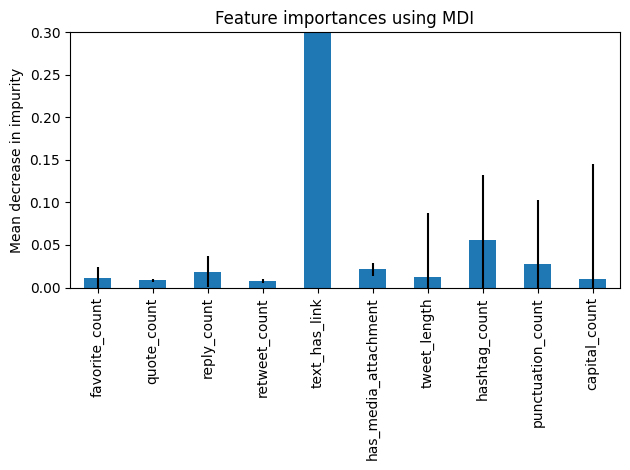

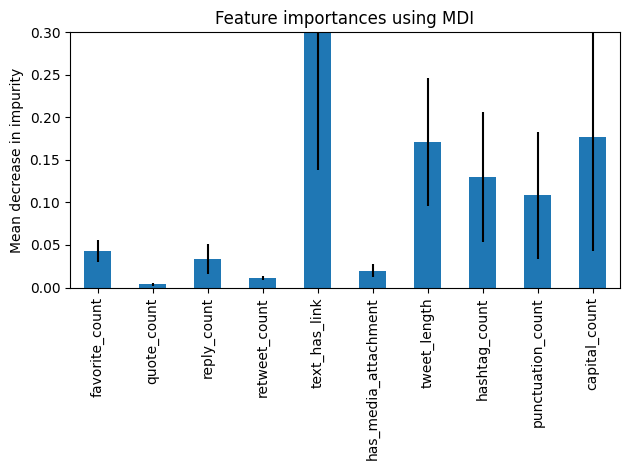

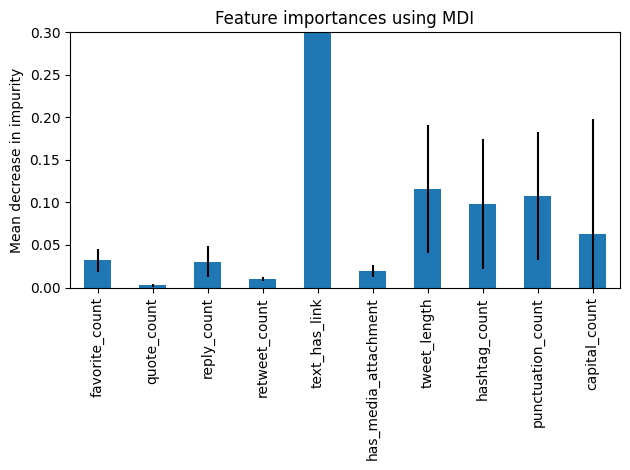

In [ ]:
# FEATURE IMPORTANCE

import numpy as np
import matplotlib.pyplot as plt

models = [xgb_model, rf_model, dt_model]

for model in models:
  print(str(model))
  importances = model.feature_importances_

  forest_importances = pd.Series(importances, index=selected_columns)
  std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

  fig, ax = plt.subplots()
  forest_importances.plot.bar(yerr=std, ax=ax)

  ax.set_ylim(0, 0.3)

  ax.set_title("Feature importances using MDI")
  ax.set_ylabel("Mean decrease in impurity")
  fig.tight_layout()

In [ ]:
bot_links = data[data['account_type'] == 'bot']['text_has_link'].mean()
human_links = data[data['account_type'] == 'human']['text_has_link'].mean()
print(f"Proportion of bots with links: {bot_links}")
print(f"Proportion of humans with links: {human_links}")

Proportion of bots with links: 0.8745314657723416
Proportion of humans with links: 0.12922002328288706


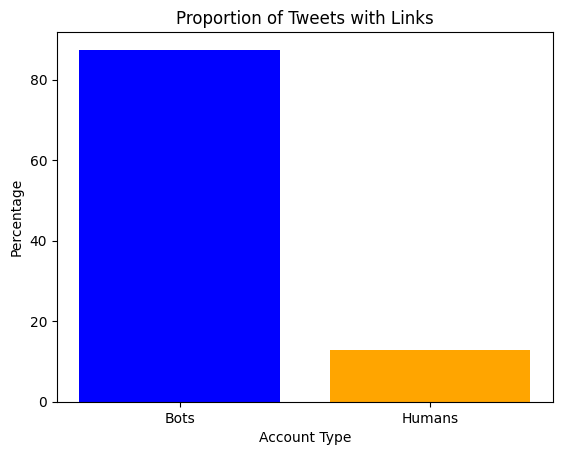

In [ ]:
# VISUALIZING PROPORTION OF BOTS/HUMANS WITH LINKS

bot_links = data[data['account_type'] == 'bot']['text_has_link'].mean()*100
human_links = data[data['account_type'] == 'human']['text_has_link'].mean()*100
proportions = {'Bots': bot_links, 'Humans': human_links}

plt.bar(proportions.keys(), proportions.values(), color=['blue', 'orange'])

plt.title('Proportion of Tweets with Links')
plt.xlabel('Account Type')
plt.ylabel('Percentage')

plt.show()

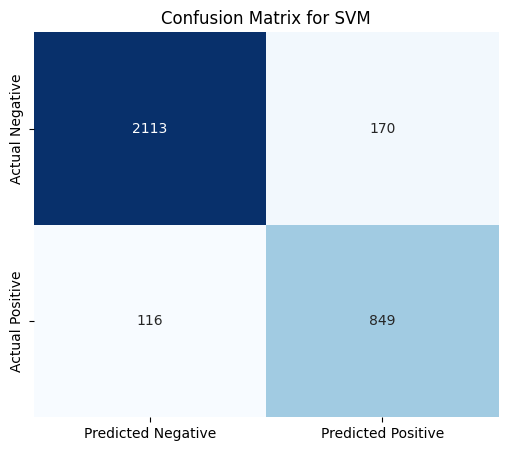

In [ ]:
# VISUALIZING CONFUSION MATRIX

import seaborn as sns
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for SVM')
plt.show()